In [1]:
# Dependencies
import numpy as np

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [2]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [3]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [76]:
# Import the sqlalchemy extract function.
from sqlalchemy import extract

# 1. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
#stmt = select(Measurement.tobs).where(
#extract("MONTH", Measurement.date)=="06")
june_temp = session.query(Measurement.tobs).\
    filter(extract("month", Measurement.date) == "06").all()
june_temp

[(78.0,),
 (76.0,),
 (78.0,),
 (76.0,),
 (77.0,),
 (78.0,),
 (77.0,),
 (78.0,),
 (78.0,),
 (79.0,),
 (78.0,),
 (78.0,),
 (78.0,),
 (77.0,),
 (78.0,),
 (78.0,),
 (77.0,),
 (77.0,),
 (82.0,),
 (78.0,),
 (78.0,),
 (78.0,),
 (78.0,),
 (78.0,),
 (77.0,),
 (76.0,),
 (78.0,),
 (78.0,),
 (78.0,),
 (78.0,),
 (77.0,),
 (78.0,),
 (73.0,),
 (70.0,),
 (76.0,),
 (77.0,),
 (77.0,),
 (77.0,),
 (77.0,),
 (78.0,),
 (77.0,),
 (77.0,),
 (78.0,),
 (78.0,),
 (77.0,),
 (78.0,),
 (78.0,),
 (75.0,),
 (76.0,),
 (76.0,),
 (77.0,),
 (78.0,),
 (76.0,),
 (77.0,),
 (75.0,),
 (77.0,),
 (76.0,),
 (76.0,),
 (75.0,),
 (77.0,),
 (77.0,),
 (76.0,),
 (78.0,),
 (77.0,),
 (76.0,),
 (77.0,),
 (76.0,),
 (76.0,),
 (77.0,),
 (77.0,),
 (78.0,),
 (77.0,),
 (77.0,),
 (77.0,),
 (76.0,),
 (75.0,),
 (76.0,),
 (76.0,),
 (77.0,),
 (76.0,),
 (73.0,),
 (73.0,),
 (75.0,),
 (77.0,),
 (76.0,),
 (77.0,),
 (79.0,),
 (78.0,),
 (79.0,),
 (78.0,),
 (78.0,),
 (79.0,),
 (77.0,),
 (77.0,),
 (77.0,),
 (77.0,),
 (77.0,),
 (78.0,),
 (77.0,),
 (76.0,),


In [77]:
# 2. Convert the June temperatures to a list.
june_tobs=list(np.ravel(june_temp))
june_tobs

[78.0,
 76.0,
 78.0,
 76.0,
 77.0,
 78.0,
 77.0,
 78.0,
 78.0,
 79.0,
 78.0,
 78.0,
 78.0,
 77.0,
 78.0,
 78.0,
 77.0,
 77.0,
 82.0,
 78.0,
 78.0,
 78.0,
 78.0,
 78.0,
 77.0,
 76.0,
 78.0,
 78.0,
 78.0,
 78.0,
 77.0,
 78.0,
 73.0,
 70.0,
 76.0,
 77.0,
 77.0,
 77.0,
 77.0,
 78.0,
 77.0,
 77.0,
 78.0,
 78.0,
 77.0,
 78.0,
 78.0,
 75.0,
 76.0,
 76.0,
 77.0,
 78.0,
 76.0,
 77.0,
 75.0,
 77.0,
 76.0,
 76.0,
 75.0,
 77.0,
 77.0,
 76.0,
 78.0,
 77.0,
 76.0,
 77.0,
 76.0,
 76.0,
 77.0,
 77.0,
 78.0,
 77.0,
 77.0,
 77.0,
 76.0,
 75.0,
 76.0,
 76.0,
 77.0,
 76.0,
 73.0,
 73.0,
 75.0,
 77.0,
 76.0,
 77.0,
 79.0,
 78.0,
 79.0,
 78.0,
 78.0,
 79.0,
 77.0,
 77.0,
 77.0,
 77.0,
 77.0,
 78.0,
 77.0,
 76.0,
 78.0,
 78.0,
 77.0,
 78.0,
 78.0,
 73.0,
 76.0,
 77.0,
 75.0,
 76.0,
 74.0,
 75.0,
 77.0,
 76.0,
 77.0,
 78.0,
 79.0,
 77.0,
 78.0,
 79.0,
 78.0,
 78.0,
 78.0,
 78.0,
 79.0,
 79.0,
 82.0,
 80.0,
 79.0,
 79.0,
 78.0,
 78.0,
 77.0,
 78.0,
 78.0,
 73.0,
 75.0,
 75.0,
 76.0,
 84.0,
 79.0,
 76.0,
 79.0,

In [85]:
# 3. Create a DataFrame from the list of temperatures for the month of June. 
import pandas as pd 
june_df = pd.DataFrame(june_tobs, columns=['June Temps'])
june_df

,June Temps
0,78.0
1,76.0
2,78.0
3,76.0
4,77.0
...,...
1695,79.0
1696,74.0
1697,74.0
1698,76.0


In [86]:
# 4. Calculate and print out the summary statistics for the June temperature DataFrame.
june_df.describe()

,June Temps
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


In [80]:
# 5. Return to your challenge instructions to compare your summary statistics

## D2: Determine the Summary Statistics for December

In [87]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
dec_temp = session.query(Measurement.tobs).\
    filter(extract("month", Measurement.date) == "12").all()
dec_temp

[(76.0,),
 (74.0,),
 (74.0,),
 (64.0,),
 (64.0,),
 (67.0,),
 (77.0,),
 (66.0,),
 (69.0,),
 (68.0,),
 (68.0,),
 (71.0,),
 (74.0,),
 (67.0,),
 (66.0,),
 (69.0,),
 (71.0,),
 (70.0,),
 (70.0,),
 (74.0,),
 (74.0,),
 (71.0,),
 (75.0,),
 (75.0,),
 (72.0,),
 (69.0,),
 (68.0,),
 (73.0,),
 (74.0,),
 (73.0,),
 (73.0,),
 (73.0,),
 (73.0,),
 (71.0,),
 (73.0,),
 (73.0,),
 (77.0,),
 (72.0,),
 (71.0,),
 (73.0,),
 (70.0,),
 (73.0,),
 (69.0,),
 (74.0,),
 (72.0,),
 (71.0,),
 (72.0,),
 (72.0,),
 (70.0,),
 (73.0,),
 (73.0,),
 (72.0,),
 (73.0,),
 (73.0,),
 (72.0,),
 (63.0,),
 (65.0,),
 (71.0,),
 (76.0,),
 (70.0,),
 (76.0,),
 (69.0,),
 (69.0,),
 (69.0,),
 (74.0,),
 (76.0,),
 (74.0,),
 (73.0,),
 (73.0,),
 (74.0,),
 (73.0,),
 (73.0,),
 (73.0,),
 (74.0,),
 (74.0,),
 (71.0,),
 (73.0,),
 (72.0,),
 (64.0,),
 (66.0,),
 (73.0,),
 (72.0,),
 (65.0,),
 (64.0,),
 (69.0,),
 (68.0,),
 (77.0,),
 (71.0,),
 (71.0,),
 (69.0,),
 (68.0,),
 (68.0,),
 (69.0,),
 (70.0,),
 (72.0,),
 (76.0,),
 (75.0,),
 (69.0,),
 (71.0,),
 (71.0,),


In [88]:
# 7. Convert the December temperatures to a list.
dec_tobs=list(np.ravel(dec_temp))
dec_tobs

[76.0,
 74.0,
 74.0,
 64.0,
 64.0,
 67.0,
 77.0,
 66.0,
 69.0,
 68.0,
 68.0,
 71.0,
 74.0,
 67.0,
 66.0,
 69.0,
 71.0,
 70.0,
 70.0,
 74.0,
 74.0,
 71.0,
 75.0,
 75.0,
 72.0,
 69.0,
 68.0,
 73.0,
 74.0,
 73.0,
 73.0,
 73.0,
 73.0,
 71.0,
 73.0,
 73.0,
 77.0,
 72.0,
 71.0,
 73.0,
 70.0,
 73.0,
 69.0,
 74.0,
 72.0,
 71.0,
 72.0,
 72.0,
 70.0,
 73.0,
 73.0,
 72.0,
 73.0,
 73.0,
 72.0,
 63.0,
 65.0,
 71.0,
 76.0,
 70.0,
 76.0,
 69.0,
 69.0,
 69.0,
 74.0,
 76.0,
 74.0,
 73.0,
 73.0,
 74.0,
 73.0,
 73.0,
 73.0,
 74.0,
 74.0,
 71.0,
 73.0,
 72.0,
 64.0,
 66.0,
 73.0,
 72.0,
 65.0,
 64.0,
 69.0,
 68.0,
 77.0,
 71.0,
 71.0,
 69.0,
 68.0,
 68.0,
 69.0,
 70.0,
 72.0,
 76.0,
 75.0,
 69.0,
 71.0,
 71.0,
 71.0,
 68.0,
 65.0,
 70.0,
 69.0,
 69.0,
 71.0,
 67.0,
 73.0,
 74.0,
 73.0,
 67.0,
 74.0,
 75.0,
 75.0,
 74.0,
 67.0,
 73.0,
 73.0,
 71.0,
 72.0,
 71.0,
 68.0,
 65.0,
 69.0,
 70.0,
 70.0,
 74.0,
 71.0,
 74.0,
 73.0,
 72.0,
 74.0,
 72.0,
 74.0,
 75.0,
 74.0,
 70.0,
 74.0,
 70.0,
 66.0,
 61.0,
 63.0,

In [89]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
dec_df=pd.DataFrame(dec_tobs, columns=['December Temps'])
dec_df

,December Temps
0,76.0
1,74.0
2,74.0
3,64.0
4,64.0
...,...
1512,71.0
1513,71.0
1514,69.0
1515,65.0


In [90]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
dec_df.describe()

,December Temps
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


In [28]:
# 10. Return to your challenge instructions to compare your summary statistics

## Determine Summary Statistics for June for the station with the highest number of temperature observations

In [37]:
# Write a query that filters the Measurement table to retrieve the temperatures for the month of June 
# for the station with the highest number of observations
results_june = session.query(Measurement.tobs).\
filter(Measurement.station == 'USC00519281') .\
filter(func.strftime("%m", Measurement.date) == "06").all()
print(results_june)

[(71.0,), (71.0,), (72.0,), (72.0,), (76.0,), (77.0,), (71.0,), (73.0,), (73.0,), (75.0,), (81.0,), (74.0,), (77.0,), (70.0,), (69.0,), (70.0,), (72.0,), (71.0,), (77.0,), (76.0,), (74.0,), (74.0,), (74.0,), (74.0,), (71.0,), (80.0,), (77.0,), (72.0,), (72.0,), (73.0,), (72.0,), (73.0,), (73.0,), (77.0,), (76.0,), (79.0,), (78.0,), (82.0,), (79.0,), (76.0,), (74.0,), (74.0,), (73.0,), (79.0,), (77.0,), (73.0,), (72.0,), (72.0,), (73.0,), (74.0,), (77.0,), (73.0,), (73.0,), (72.0,), (72.0,), (67.0,), (71.0,), (73.0,), (78.0,), (71.0,), (72.0,), (70.0,), (72.0,), (73.0,), (74.0,), (81.0,), (72.0,), (77.0,), (69.0,), (69.0,), (69.0,), (78.0,), (78.0,), (73.0,), (72.0,), (71.0,), (72.0,), (72.0,), (73.0,), (71.0,), (70.0,), (71.0,), (68.0,), (72.0,), (71.0,), (78.0,), (81.0,), (74.0,), (74.0,), (73.0,), (73.0,), (72.0,), (73.0,), (77.0,), (73.0,), (73.0,), (75.0,), (72.0,), (72.0,), (73.0,), (73.0,), (75.0,), (72.0,), (73.0,), (70.0,), (69.0,), (68.0,), (75.0,), (74.0,), (73.0,), (70.0,), 

In [42]:
# Convert June temperatures results to a list.
# Create a DataFrame from this list 
june_tobs_station=list(np.ravel(results_june))
df_june_station=pd.DataFrame(june_tobs_station, columns=['June Temps'])
df_june_station

,June Temps
0,71.0
1,71.0
2,72.0
3,72.0
4,76.0
...,...
231,73.0
232,76.0
233,77.0
234,76.0


In [41]:
# Calculate and print out the summary statistics for June temperature, for the station with the highest number of observations
df_june_station.describe()

,June Temps
count,236.000000
mean,73.271186
std,2.989801
min,65.000000
25%,71.000000
50%,73.000000
75%,75.000000
max,82.000000


## Determine Summary Statistics for December for the station with the highest number of temperature observations

In [29]:
# Write a query that filters the Measurement table to retrieve the temperatures for the month of December  
# for the station with the highest number of observations
results_dec = session.query(Measurement.tobs).\
filter(Measurement.station == 'USC00519281') .\
filter(func.strftime("%m", Measurement.date) == "12").all()
print(results_dec)

[(72.0,), (71.0,), (72.0,), (74.0,), (66.0,), (61.0,), (58.0,), (60.0,), (71.0,), (65.0,), (72.0,), (70.0,), (68.0,), (67.0,), (71.0,), (65.0,), (64.0,), (65.0,), (69.0,), (70.0,), (70.0,), (68.0,), (69.0,), (71.0,), (70.0,), (71.0,), (76.0,), (71.0,), (72.0,), (73.0,), (77.0,), (67.0,), (69.0,), (72.0,), (74.0,), (71.0,), (70.0,), (68.0,), (70.0,), (66.0,), (72.0,), (70.0,), (70.0,), (70.0,), (70.0,), (73.0,), (71.0,), (69.0,), (73.0,), (72.0,), (71.0,), (69.0,), (70.0,), (69.0,), (70.0,), (75.0,), (71.0,), (70.0,), (69.0,), (71.0,), (65.0,), (67.0,), (72.0,), (67.0,), (76.0,), (67.0,), (72.0,), (69.0,), (66.0,), (75.0,), (74.0,), (72.0,), (72.0,), (72.0,), (68.0,), (74.0,), (73.0,), (73.0,), (72.0,), (70.0,), (70.0,), (71.0,), (70.0,), (72.0,), (65.0,), (62.0,), (73.0,), (71.0,), (70.0,), (62.0,), (69.0,), (69.0,), (66.0,), (72.0,), (73.0,), (70.0,), (66.0,), (64.0,), (65.0,), (73.0,), (74.0,), (67.0,), (73.0,), (70.0,), (67.0,), (71.0,), (78.0,), (69.0,), (63.0,), (64.0,), (66.0,), 

In [45]:
# Convert December temperatures results to a list.
# Create a DataFrame from this list 
dec_tobs_station=list(np.ravel(results_dec))
df_dec_station=pd.DataFrame(dec_tobs_station, columns=['December Temps'])
df_dec_station

,December Temps
0,72.0
1,71.0
2,72.0
3,74.0
4,66.0
...,...
212,71.0
213,72.0
214,74.0
215,69.0


In [31]:
# Calculate and print out the summary statistics for December temperature, for the station with the highest number of observations
df_dec_station.describe()

,December Temps
count,217.000000
mean,69.903226
std,3.803609
min,58.000000
25%,68.000000
50%,70.000000
75%,73.000000
max,79.000000


## Determine Summary Statistics for Precipitation in June 

In [44]:
# Write a query that filters the Measurement table to retrieve the precipitation for the month of June
june_prcp = session.query(Measurement.prcp).\
    filter(func.strftime("%m", Measurement.date) == "06").all()
june_prcp

[(0.0,),
 (0.01,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.02,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.07,),
 (0.0,),
 (0.56,),
 (0.89,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.03,),
 (0.01,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.05,),
 (0.06,),
 (0.07,),
 (None,),
 (0.0,),
 (0.0,),
 (0.01,),
 (0.01,),
 (0.0,),
 (0.02,),
 (0.02,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (None,),
 (None,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.03,),
 (0.15,),
 (0.01,),
 (0.0,),
 (0.05,),
 (0.0,),
 (0.01,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.37,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.01,),
 (0.0,),
 (0.04,),
 (0.12,),
 (0.04,),
 

In [47]:
# Convert June precipitation results to a list.
# Create a DataFrame from this list 
june_prcp_list=list(np.ravel(june_prcp))
june_prcp_df=pd.DataFrame(june_prcp_list, columns=["June Precipitation"])
june_prcp_df

,June Precipitation
0,0.00
1,0.01
2,0.00
3,0.00
4,0.00
...,...
1695,0.02
1696,0.10
1697,0.02
1698,0.04


In [48]:
# Calculate and print out the summary statistics for June precipitation
june_prcp_df.describe()

,June Precipitation
count,1574.000000
mean,0.136360
std,0.335731
min,0.000000
25%,0.000000
50%,0.020000
75%,0.120000
max,4.430000


## Determine Summary Statistics for Precipitation in December  

In [49]:
# Write a query that filters the Measurement table to retrieve the precipitation for the month of December
dec_prcp = session.query(Measurement.prcp).\
    filter(func.strftime("%m", Measurement.date) == "12").all()
dec_prcp

[(0.04,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (1.58,),
 (0.77,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (1.4,),
 (0.0,),
 (0.0,),
 (None,),
 (0.13,),
 (0.55,),
 (0.06,),
 (0.01,),
 (0.0,),
 (0.03,),
 (0.08,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.13,),
 (0.07,),
 (0.07,),
 (0.08,),
 (0.4,),
 (0.7,),
 (0.0,),
 (0.01,),
 (0.07,),
 (0.02,),
 (0.15,),
 (0.02,),
 (0.18,),
 (0.03,),
 (0.04,),
 (0.1,),
 (0.03,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.01,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.2,),
 (0.01,),
 (None,),
 (None,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.14,),
 (0.09,),
 (0.01,),
 (0.02,),
 (0.02,),
 (0.12,),
 (0.0,),
 (0.1,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.03,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.04,),
 (0.0,),
 (2.01,),
 (0.01,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.03,),
 (0.0,),
 (0.0,),
 (0.02,),
 (0.0,),
 (0.0,),
 (1.1,),
 (0.02,),
 (0.0,),
 (0.16,),
 (0.09,),
 (0.

In [51]:
# Convert December precipitation results to a list.
# Create a DataFrame from this list 
dec_prcp_list=list(np.ravel(dec_prcp))
dec_prcp_df=pd.DataFrame(dec_prcp_list, columns=["December Precipitation"])
dec_prcp_df

,December Precipitation
0,0.04
1,0.00
2,0.00
3,0.00
4,0.00
...,...
1512,0.14
1513,0.14
1514,1.03
1515,2.37


In [54]:
# Calculate and print out the summary statistics for June precipitation
dec_prcp_df.describe()

,December Precipitation
count,1405.000000
mean,0.216819
std,0.541399
min,0.000000
25%,0.000000
50%,0.030000
75%,0.150000
max,6.420000


### Plot the precippitation to June and December 

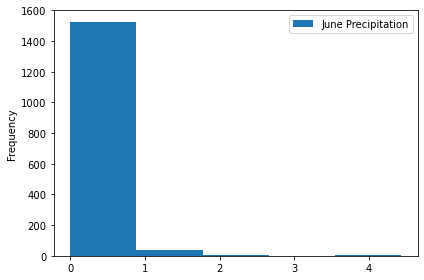

In [69]:
# Precipitation Histogram for June 
import matplotlib.pyplot as plt

june_prcp_df.plot.hist(bins=5)
plt.tight_layout()

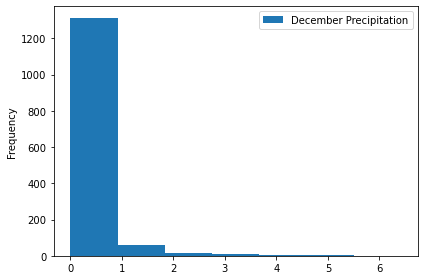

In [70]:
# Precipitation Histogram for December  
dec_prcp_df.plot.hist(bins=7)
plt.tight_layout()